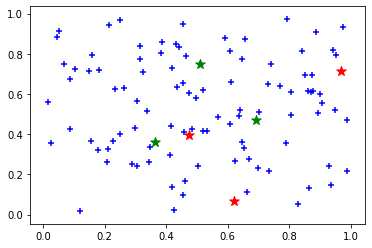

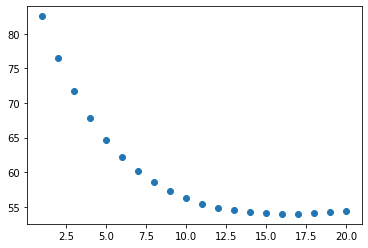

In [84]:
import random
import matplotlib.pyplot as plt


def initialize():
    num_city = 100
    num_air = 3
    cities = set()
    airports = []

    for i in range(num_city):
        x = random.random()
        y = random.random()
        cities.add((x,y))

    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y))
    
    return cities, airports
    
    
def f(cities, airports):
    distance = 0
    for a in airports:
        for c in cities:
            distance += ((a[0] - c[0])**2) + ((a[1] - c[1])**2)
    return distance


def showMap(cities, airports, old_airports):
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='g', s=100, label='New Airports')
    zip_airs_old = zip(*old_airports)
    plt.scatter(*zip_airs_old, marker='*', color='r', s=100, label='Original Airports')
    plt.show()
    plt.close()


def split_cities(cities):
    c1 = set()
    c2 = set()
    c3 = set()
    
    for c in cities:
        distanceA = ((airports[0][0] - c[0])**2) + ((airports[0][1] - c[1])**2)
        distanceB = ((airports[1][0] - c[0])**2) + ((airports[1][1] - c[1])**2)
        distanceC = ((airports[2][0] - c[0])**2) + ((airports[2][1] - c[1])**2)
        distances = [distanceA, distanceB, distanceC]
        if distanceA == min(distances):
            c1.add(c)
        elif distanceB == min(distances):
            c2.add(c)
        else:
            c3.add(c)
    return c1, c2, c3


"""
Calculates the gradient for each aiport and updates their location
Initial gradient is 0, and then the airports coordinates are passed in as the init

def gradient_element(cities, airports, gradient):
    a = .0001
    c1, c2, c3 = split_cities(cities)
    
    for c in c1:
        gradient[0] += (airports[0][0] - c[0])
        gradient[1] += (airports[0][1] - c[1])
    gradient[0] *= 2
    gradient[1] *= 2
    for c in c2:
        gradient[2] += 2*(airports[0][0] - c[0])
        gradient[3] += 2*(airports[0][1] - c[1]) 
    gradient[2] *= 2
    gradient[3] *= 2
    for c in c3:
        gradient[4] += 2*(airports[0][0] - c[0])
        gradient[5] += 2*(airports[0][1] - c[1])
    gradient[4] *= 2
    gradient[5] *= 2
    return [(airports[0][0] - a*gradient[0],airports[0][1] - a*gradient[1]),(airports[1][0] - a*gradient[2], airports[1][1] - a*gradient[3]),( airports[2][0] - a*gradient[4],airports[2][1] - a*gradient[5])]

"""


def calculate_gradient(cities, airports):
    c1, c2, c3 = split_cities(cities)
    x_1, y_1, x_2, y_2, x_3, y_3 = 0,0,0,0,0,0
    for c in c1:
        x_1 += (airports[0][0] - c[0])
        y_1 += (airports[0][1] - c[1])
    for c in c2:
        x_2 += (airports[1][0] - c[0])
        y_2 += (airports[1][1] - c[1])
    for c in c3:
        x_3 += (airports[2][0] - c[0])
        y_3 += (airports[2][1] - c[1])
    
    return [2*x_1, 2*y_1, 2*x_2, 2*y_2, 2*x_3, 2*y_3]
                


def main():
    cities, airports = initialize()
    old_airports = airports.copy()
    # epochs = random.randint(25,100)
    epochs = 20
    a = 0.001
    distances = []
    for i in range(epochs):
        gradient = calculate_gradient(cities, airports)
        airports[0] = (airports[0][0]-(a*gradient[0]), airports[0][1]-(a*gradient[1]))
        airports[1] = (airports[1][0]-(a*gradient[2]), airports[1][1]-(a*gradient[3]))
        airports[2] = (airports[2][0]-(a*gradient[4]), airports[2][1]-(a*gradient[5]))
            
        distances.append(f(cities, airports))

    showMap(cities, airports, old_airports)
    
    plt.scatter(list(range(1, epochs+1)),distances)

    
main()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

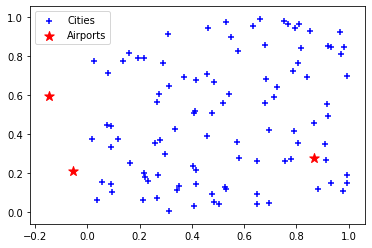

In [83]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">